In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
true=pd.read_csv("True.csv")
false=pd.read_csv("Fake.csv")

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true["label"]=1
false["label"]=0

In [6]:
news=pd.concat([true,false],axis=0)

In [7]:
news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
news.tail()

,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [9]:
news.shape

(44898, 5)

In [10]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [11]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


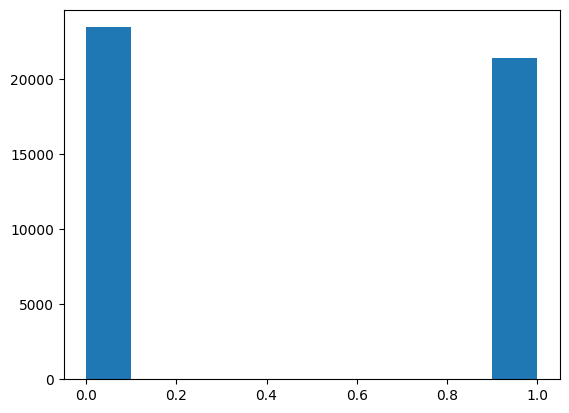

In [12]:
plt.hist(news.label);

In [13]:
news=news.drop("date",axis=1)

In [14]:
news=news.sample(frac=1).reset_index(drop=True)
news.head()

,title,text,subject,label
0,Dinesh D’Souza DESTROYS Leftist College Studen...,This is a MUST watch from start to finish. The...,left-news,0
1,Trump tax overhaul under intensifying fire as ...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,1
2,Tillerson says would support maintaining Russi...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,1
3,Eight Kenyan schoolgirls die in dormitory blaz...,NAIROBI (Reuters) - Eight Kenyan teenage schoo...,worldnews,1
4,Police arrest Japanese man after body parts fo...,TOKYO (Reuters) - A Japanese man was arrested ...,worldnews,1


In [15]:
from nltk.stem.porter import PorterStemmer

In [16]:
from nltk.corpus import stopwords

In [17]:
port_stem=PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u194168/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
def steming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [19]:
news["title"]=news["title"].apply(steming)

In [20]:
news["text"]=news["text"].apply(steming)

In [21]:
news.head()

,title,text,subject,label
0,dinesh souza destroy leftist colleg student wh...,must watch start finish never leftist defeat b...,left-news,0
1,trump tax overhaul intensifi fire congress rea...,washington reuter presid donald trump plan ove...,politicsNews,1
2,tillerson say would support maintain russia sa...,washington reuter presid elect donald trump no...,politicsNews,1
3,eight kenyan schoolgirl die dormitori blaze go...,nairobi reuter eight kenyan teenag schoolgirl ...,worldnews,1
4,polic arrest japanes man bodi part found apart,tokyo reuter japanes man arrest tuesday part d...,worldnews,1


In [22]:
news["subject"].unique()

array(['left-news', 'politicsNews', 'worldnews', 'News', 'politics',
       'Government News', 'US_News', 'Middle-east'], dtype=object)

In [23]:
ohe=pd.get_dummies(news.subject)

In [24]:
ohe.head()

,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


In [25]:
news_pre=pd.concat([news,ohe],axis=1)

In [26]:
news_pre.head()

,title,text,subject,label,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews
0,dinesh souza destroy leftist colleg student wh...,must watch start finish never leftist defeat b...,left-news,0,0,0,0,0,1,0,0,0
1,trump tax overhaul intensifi fire congress rea...,washington reuter presid donald trump plan ove...,politicsNews,1,0,0,0,0,0,0,1,0
2,tillerson say would support maintain russia sa...,washington reuter presid elect donald trump no...,politicsNews,1,0,0,0,0,0,0,1,0
3,eight kenyan schoolgirl die dormitori blaze go...,nairobi reuter eight kenyan teenag schoolgirl ...,worldnews,1,0,0,0,0,0,0,0,1
4,polic arrest japanes man bodi part found apart,tokyo reuter japanes man arrest tuesday part d...,worldnews,1,0,0,0,0,0,0,0,1


In [27]:
news_pre=news_pre.drop("subject",axis=1)

In [29]:
news_pre['combined'] = news_pre['title'] + ' ' + news_pre['text']

In [32]:
x=news_pre["combined"]
y=news_pre["label"]

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfid=TfidfVectorizer()
tfid.fit(x)
x=tfid.transform(x)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1681: RuntimeWarning: divide by zero encountered in divide
  idf = np.log(n_samples / df) + 1


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,stratify=y,random_state=2)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
model.score(x_test,y_test)

0.9857461024498887

In [40]:
y_pred=model.predict(x_test)
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[4622,   74],
       [  54, 4230]])

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
print(model1.score(x_test,y_test))
y_pred=model1.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

0.9913140311804008


array([[4669,   27],
       [  51, 4233]])